In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [2]:
Years = ["2000","2001","2002"]

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:
N_head = 5 # first 5 lines are head lines, not include data
N_column = 4+2

Nx = 36
Ny = 21
Nz = 5
N_parcel = 3780

if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')

directory = '/n/home12/hongwei/HONGWEI/lagranto.era5/Simulation/Python_plot/Lifetime_'+Years[0]+'/'
filename = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory+filename)

/n/home12/hongwei/HONGWEI/lagranto.era5/Simulation/Python_plot/Lifetime_2000/Lifetime_20000101.txt


In [4]:
N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)

lifetime = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime.shape

(5, 21, 36, 10, 12, 3)

In [29]:
Total_num = np.zeros(366*(N_year+10))

In [30]:
from datetime import date

In [39]:
print(int(Years[0]), int(Months[0]), int(Days[0]))

for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            directory = '/n/home12/hongwei/HONGWEI/lagranto.era5/Simulation/Python_plot/Lifetime_'+Years[i_year]+'/'
            filename = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File = open(directory+filename, 'r')
        
            Lines = File.readlines()

            
            # For Total_num
            f_date = date( int(Years[0]), int(Months[0]), int(Days[0]) )
            l_date = date( int(Years[i_year]), int(Months[i_month]), int(Days[i_day]) )
            Delta  = l_date - f_date
            Delta_day = Delta.days
#             print(int(Years[i_year]), int(Months[i_month]), int(Days[i_day]), Delta_day)
                
                
            # Strips the newline character
            data = []
            data_N = []
            for line in Lines:
                a = line.split(',')
                data.append(float(a[0])) # total lifetime
#                 data_N.append(float(a[1]))
#                 data_S.append(float(a[2]))


                # Total_num
                Num_1d = np.zeros(366*(N_year+10))
                Num_1d[Delta_day:Delta_day+int(float(a[0]))] = 1
                
                Total_num = Total_num + Num_1d
    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz):
                        lifetime[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        
                        i = i+1
# Life10_mean = np.mean(lifetime_10, axis=(1,2,3))

  0%|          | 0/12 [00:00<?, ?it/s]

2000 1 1


100%|██████████| 12/12 [00:05<00:00,  2.16it/s]


In [40]:
f_date = date( int(Years[0]), int(Months[0]), int(Days[0]) )
l_date = date( int(Years[-1]), int(Months[-1]), int(Days[-1]) )
Delta  = l_date - f_date
Delta_day = Delta.days

End_injection_day = Delta_day     

Text(0, 0.5, 'Total number of injected particle in the stratosphere')

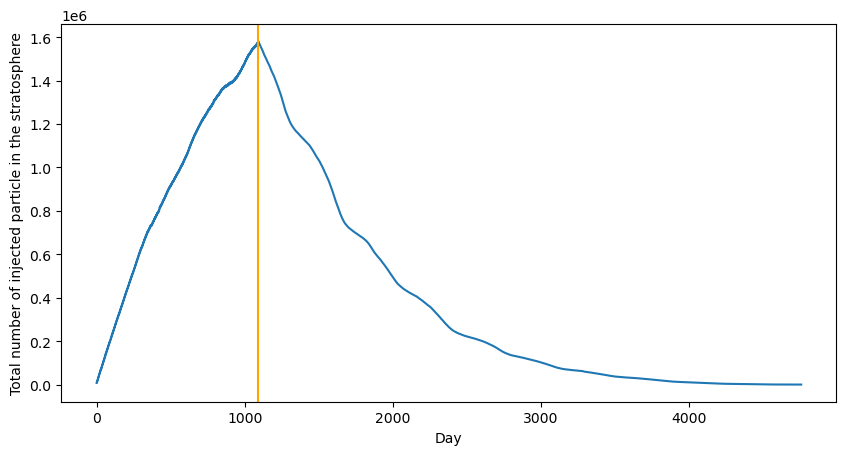

In [50]:
fig = plt.figure(figsize=(10,5), dpi=100)

plt.plot(Total_num)

plt.axvline(x=End_injection_day, c='orange')

plt.xlabel("Day")
plt.ylabel("Total number of injected particle in the stratosphere")

# plt.xlim()

# plt.xscale("log")
# plt.yscale("log")